In [1]:
import cv2
import numpy as np
import glob
import os

In [4]:
####### transfer learning model

################# import various transfer elarning models ###################

#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications import Xception


#############################################################################

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications import ResNet101V2

import tensorflow as tf


########
IMAGE_SIZE = [32,32]
CLASS=6
######


#mod =  tf.keras.applications.VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#mod = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

mod = ResNet101V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in mod.layers:
    layer.trainable = False

x = Flatten()(mod.output)

prediction = Dense(CLASS, activation='softmax')(x)

model = Model(inputs=mod.input, outputs=prediction)

############################ optimizer and learning rate ##################


adam = tf.keras.optimizers.Adam(learning_rate=0.001)   
model.compile(
  loss='categorical_crossentropy', ### for multi class calsification
  #loss='binary_crossentropy', ### for binary calsification
  optimizer=adam,
  metrics=['accuracy']
)

#########################################################################


model.optimizer.get_config()
print("\n\n")
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 8, 8, 64)  │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 8, 8, 64)  │          0 │ conv2_block1_pre… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 10, 10,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 8, 8, 256) │          0 │ conv2_block1_0_c

 Total params: 42,638,854 (162.65 MB)

 Trainable params: 12,294 (48.02 KB)

 Non-trainable params: 42,626,560 (162.61 MB)

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  # shear_range = 0.2,
                                  # zoom_range = 0.2,
                                   brightness_range=(0.4, 0.7),
                                   vertical_flip= True,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/kaggle/input/split-monkey-pox-dataset/Monkey split/train',
                                                 target_size = (32,32),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory('/kaggle/input/split-monkey-pox-dataset/Monkey split/val',
                                            target_size = (32,32),
                                            batch_size = 128,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/kaggle/input/split-monkey-pox-dataset/Monkey split/test',
                                           target_size = (32,32),
                                           batch_size = 1,
                                           class_mode = 'categorical')



model.optimizer.get_config()

Found 4200 images belonging to 6 classes.
Found 900 images belonging to 6 classes.
Found 900 images belonging to 6 classes.


{'name': 'adam',
 'learning_rate': 0.0010000000474974513,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from PIL import Image

# Correct filepath for saving weights only
filepath = "/content/ReseNet_101V2.weights.h5"  # ✅ must end with .weights.h5

checkpoint1 = ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
    mode='max'
)

log_csv = CSVLogger('/content/ReseNet_101V2.csv', separator=',', append=False)

callbacks_list = [checkpoint1, log_csv]

r = model.fit(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1757701443.662223      95 service.cc:148] XLA service 0x7c6a5c0054f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757701443.663109      95 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757701446.437382      95 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/33 ━━━━━━━━━━━━━━━━━━━━ 14:33 27s/step - accuracy: 0.1172 - loss: 1.8802

I0000 00:00:1757701450.214241      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.2082 - loss: 1.7840
Epoch 1: val_accuracy improved from -inf to 0.34889, saving model to /content/ReseNet_101V2.weights.h5
33/33 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2098 - loss: 1.7823 - val_accuracy: 0.3489 - val_loss: 1.6324
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.3811 - loss: 1.5991
Epoch 2: val_accuracy improved from 0.34889 to 0.42111, saving model to /content/ReseNet_101V2.weights.h5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.3821 - loss: 1.5978 - val_accuracy: 0.4211 - val_loss: 1.5252
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.4518 - loss: 1.4746
Epoch 3: val_accuracy improved from 0.42111 to 0.44444, saving model to /content/ReseNet_101V2.weights.h5
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.4518 - loss: 1.4744 - val_accuracy: 0.4444 - val_loss: 1.4615
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.4722 - loss: 1.4272

In [10]:
# Convert one-hot to class labels
y_true_classes = np.argmax(y_true, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute test accuracy
test_accuracy = np.sum(y_true_classes == y_pred_classes) / len(y_true_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.6089


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Validation Accuracy: 0.6089
Classification Report:
               precision    recall  f1-score   support

  Chickenpox       0.66      0.61      0.63       150
      Cowpox       0.73      0.69      0.71       150
        HFMD       0.49      0.66      0.56       150
     Healthy       0.58      0.67      0.62       150
     Measles       0.75      0.61      0.67       150
   Monkeypox       0.51      0.42      0.46       150

    accuracy                           0.61       900
   macro avg       0.62      0.61      0.61       900
weighted avg       0.62      0.61      0.61       900



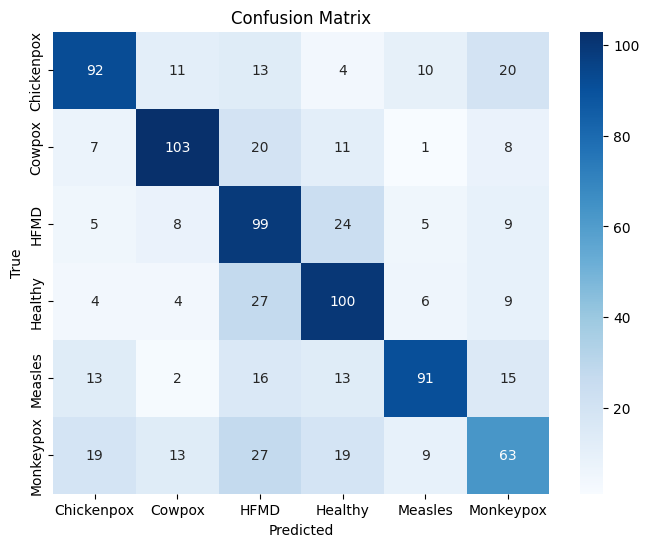

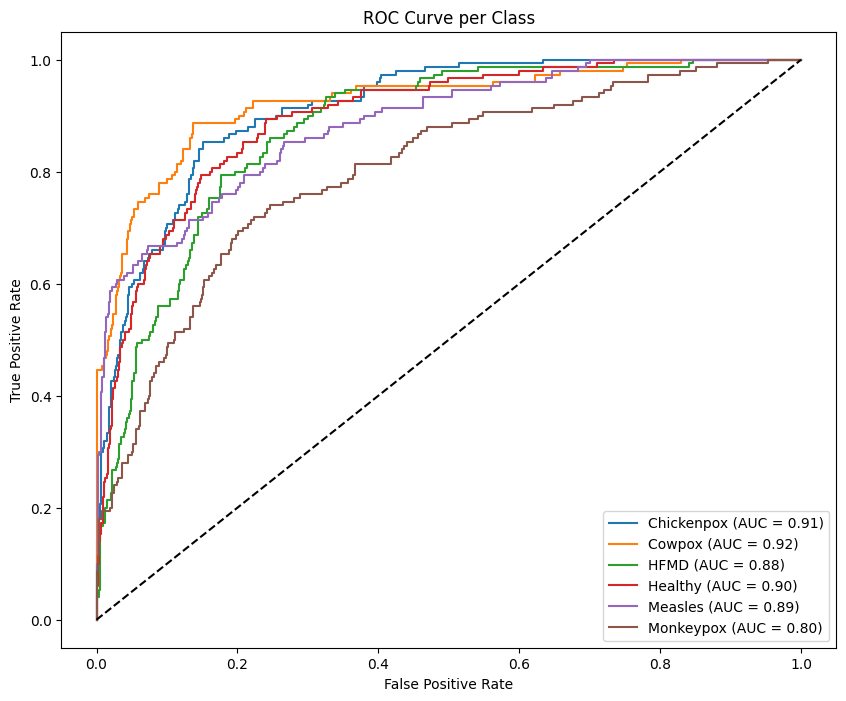

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# ----------------- Predict on test/validation set -----------------
# If you don't have a separate test set, use validation set
val_steps = len(val_set)
y_true = []
y_pred = []

for i in range(val_steps):
    X_batch, y_batch = next(val_set)
    preds = model.predict(X_batch)
    y_pred.append(preds)
    y_true.append(y_batch)

y_true = np.vstack(y_true)
y_pred = np.vstack(y_pred)

# Convert one-hot to class labels
y_true_classes = np.argmax(y_true, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# ----------------- Accuracy -----------------
accuracy = np.sum(y_true_classes == y_pred_classes) / len(y_true_classes)
print(f"Validation Accuracy: {accuracy:.4f}")

# ----------------- Classification Report -----------------
target_names = list(val_set.class_indices.keys())
report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
print("Classification Report:\n", report)

# ----------------- Confusion Matrix -----------------
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ----------------- ROC Curve -----------------
plt.figure(figsize=(10, 8))
for i in range(len(target_names)):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{target_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Class')
plt.legend(loc='lower right')
plt.show()
